# 7.4 Multilayer Perceptron for Classification

**A Multilayer Perceptron (MLP)** is a type of artificial neural network that consists of an input layer, one or more hidden layers, and an output layer. It is a powerful model used for supervised learning tasks, such as classification and regression.

Each neuron in the MLP applies a nonlinear activation function to a weighted sum of its inputs, allowing the network to learn complex patterns in the data. During **training**, by using backpropagation, the MLP adjusts the weights of connections in the network to minimize the error between predicted and actual values. During **inference**, the MLP is faced with new input data, producing an inference result.

MLPs are particularly effective for solving classification problems where the relationship between inputs and outputs is non-linear. In this notebook, we will use an MLP to classify iris flowers into three different species, and breast cancer cases as either malignant or benign, based on a set of features. For that, we will first explore the data we are going to work with (<a href="#741">section 7.4.1</a>), then the **Perceptron model** (the building block of many neural networks, <a href="#742">section 7.4.2</a>), and finally the **Multilayer Perceptron** (<a href="#743">section 7.4.3</a>). 

This will be doing in the context of the [scikit-learn library](https://scikit-learn.org/stable/index.html), an open source software for predictive analysis.


## Problem Context: Iris and Breast Cancer Classification

In this notebook, you will have the option to explore two different classification tasks using machine learning:

### 1. Iris Classification:
The **Iris dataset** is a classic dataset used in machine learning and statistics. It contains 150 samples from three different species of Iris flowers: Setosa, Versicolor, and Virginica. Each sample has four features:
- Sepal length
- Sepal width
- Petal length
- Petal width

The task is to build a classifier that can predict the species of an Iris flower based on these four features. The target classes are:
- **0**: Setosa
- **1**: Versicolor
- **2**: Virginica

This is a **multiclass classification problem** where the goal is to distinguish between the three flower species. An interesting fact is that one class is linearly separable from the other 2, but the latter are not linearly separable from each other. 

For your reference, here an example of each specie:

<center><img width="600" src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="iris" class="centerimage">
<br /> Image from <i>Machine Learning in R for beginners</i>.</center>

### 2. Breast Cancer Classification:
The **Breast Cancer dataset** is focused on medical diagnosis, aiming to classify whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on the features derived from a digitized image of a fine needle aspirate of a breast mass. This dataset includes 30 features that describe the characteristics of the cell nuclei, such as radius, texture, and smoothness. 

The target classes in this dataset are:
- **0**: Malignant
- **1**: Benign

This is a **binary classification problem** where the goal is to correctly classify tumors as malignant or benign based on the input features.

### Why these datasets? 

Because they were or could be obtained using computer vision techniques. In both cases, the regions of interest could be segmentend and then characterized through a number of features.

**We encourage you** to take a look at their description in the scikit-learn page. They are part of the **Toy examples** collection, which can be accessed [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets). On the other hand, there are also larger datasets, listed in the **Real world datasets** collection available [here](https://scikit-learn.org/stable/datasets/real_world.html#real-world-datasets).

The world wide web is full of datasets, there are platforms like [kaggle](https://www.kaggle.com/) that are a good entry point to this world.

### Your Task:
- You will use a **Perceptron** (a single-layer neural network) and a **Multilayer Perceptron (MLP)** (a deep neural network with hidden layers) to classify both datasets.
- You can select which dataset you'd like to work with first and explore the performance of both models on these two datasets.


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 7.4.1 Loading and analyzing the datasets <a id="741"></a>

Let's load a dataset and take a look at its content. We will start working with the Iris dataset and we recommend you to complete the notebook with this one. Once completed, you can change to the Breast cancer classification or any other. Up to you!

In [2]:
# Load the dataset

# Iris dataset
iris_data = load_iris()
X = iris_data.data  # Features
y = iris_data.target  # Target labels
feature_names = iris_data.feature_names

# Breast cancer dataset
# breast_cancer_data = load_breast_cancer()
# X = breast_cancer_data.data  # Features (30-dimensional feature vectors)
# y = breast_cancer_data.target  # Target labels (0: malignant, 1: benign)
# feature_names = breast_cancer_data.feature_names

# wine_data = load_wine()
# X = wine_data.data  # Features (13-dimensional feature vectors)
# y = wine_data.target  # Target labels (0, 1, or 2, representing different wine classes)
# feature_names = wine_data.feature_names

# Display basic information about the dataset
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {np.unique(y)}")

# Show the first 5 samples and their corresponding labels
print("First 5 samples (feature vectors):")
print(X[:5])
print("Corresponding labels:")
print(y[:5])

Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [0 1 2]
First 5 samples (feature vectors):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Corresponding labels:
[0 0 0 0 0]


### **<span style="color:green"><b><i>ASSIGNMENT 1: Feature scaling</i></b></span>**

First of all, let's start by investigating the range of the different features of the dataset. 

You are tasked to:
- Compute the minimum and maximum value of each feature.
- Represent their dispersion using a [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).
- Think about the obtained results.

Feature minimums: [4.3 2.  1.  0.1]
Feature maximums: [7.9 4.4 6.9 2.5]


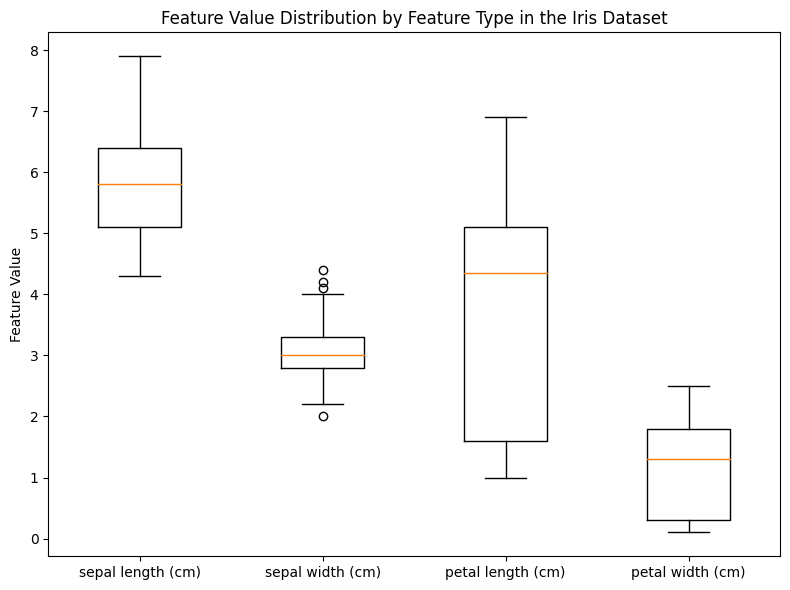

In [3]:
# Display the minimum and maximum values of each feature
print("Feature minimums:", None.min(axis=0))
print("Feature maximums:", None.max(axis=0))

# Create a box plot for each feature
plt.figure(figsize=(8, 6))

# Create a box plot, each feature on the x-axis
plt.boxplot(None, labels=None)

# Add labels and title
plt.title('Feature Value Distribution by Feature Type in the Iris Dataset')
plt.ylabel('Feature Value')

# Show the plot
plt.tight_layout()
plt.show()

<font color='blue'>**Expected output (with Iris dataset):**  </font>

    Feature minimums: [4.3 2.  1.  0.1]
    Feature maximums: [7.9 4.4 6.9 2.5]

The Perceptron and MLP models, as many other machine learning techniques, face problems if the input data is **unscaled**. As you have experienced, input features in real-world datasets often vary widely in terms of their value ranges. These differences in scale cause problems because the learning process in neural networks relies heavily on gradient-based optimization algorithms, such as stochastic gradient descent (SGD).

If the features have different ranges, the model may struggle to balance the influence of each feature, causing several issues:

- Unequal updates to weights.
- Slow convergence.
- Vanishing or exploiding gradients.

To address this, we perform a **preprocessing step** to **scale** the input data so that all features have the same range  [**(more info here)**](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). Two common methods are **standarization**, where each feature is rescaled to have a mean of 0 and a standard deviation of 1, and **normalization**, where each feature is rescaled to fit within a specific range, typically $[0, 1]$.

We will play with standarization, which computes the new feature values as:

$$ x' = \frac{x-\mu}{\sigma}$$

where:
- $x$ is the original feature value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

You **are tasked to** complete the following code so:

- It splits the dataset into training and testing data with `train_test_split()` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), 
- Then normalizes the features' values using an instance of the `StandardScaler` class [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). First fit the scaler with the training features, and then transform the testing one as well.
- Finally, it shows the feature values of the first 5 samples in the training data scaled. Complete it!

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(None, 
                                                    None, 
                                                    test_size=0.3, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(None)
X_test_scaled = scaler.transform(None)

# Display the first 5 rows of the scaled data to check
print("First 5 rows of the scaled training data:")
print(None)

First 5 rows of the scaled training data:
[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]


<font color='blue'>**Expected output (with Iris dataset):**  </font>

    First 5 rows of the scaled training data:
    [[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
     [ 0.55122187 -0.50256349  0.71770262  0.35303182]
     [ 0.67180165  0.21701605  0.95119225  0.75888956]
     [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
     [ 1.63643991  1.41631528  1.30142668  1.70589097]]

## 7.4.2 Perceptron: The Building Block of Neural Networks <a id="742"></a>

A **Perceptron** is the simplest form of a neural network and can be seen as a single neuron. It is a linear classifier that makes predictions by applying a linear combination of inputs and weights, followed by a threshold (or step) function to produce a **binary output**, so it is applied to two-class problems.

### The Math Behind the Perceptron

For a given input vector of features $ \mathbf{\tilde{x}} = [x_1, x_2, ..., x_n, 1]^T $ and a corresponding weight vector $ \mathbf{w} = [w_1, w_2, ..., w_n, w_{n+1}]^T $, the perceptron computes a weighted sum of the inputs, called **pre-activation**:

$$
z = \sum_{i=1}^{n+1} w_i \tilde{x}_i = \mathbf{w}^T \mathbf{\tilde{x}}
$$

You can also find in the literature definitions where the last weight, $w_{n+1}$, is left out and denoted $b$. At any case, it plays the role of a **bias term**, which allows the decision boundary to be shifted.

Once the weighted sum $ z $ is computed, the Perceptron applies an activation function $a(z)$ to determine the output:

$$
\hat{y} = a(\mathbf{w}^T \mathbf{\tilde{x}}) \in \{0,1\}
$$

Visually:

<center><img src="./images/perceptron.jpg" alt="perceptron_structure" class="centerimage"></center>

The traditional activation function for a Perceptron is the **step function**, which outputs:

$$
\hat{y} = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{otherwise}
\end{cases}
$$

### Perceptron Learning

During training, the Perceptron updates its weights using the following rule:

$$
w_i \leftarrow w_i + \Delta w_i
$$

Where the weight update $\Delta w_i$ is calculated as:

$$
\Delta w_i = \eta \cdot e_i \cdot x_i = \eta \cdot (y - \hat{y}) \cdot x_i
$$

Here:
- $ y $ is the true label.
- $ \hat{y} $ is the predicted label.
- $ \eta $ is the learning rate, a scalar that controls how much the weights are adjusted with each step.

If the Perceptron makes an incorrect prediction (i.e., $ y \neq \hat{y} $), the weights are adjusted in the direction that reduces the prediction error.

### Extension to Multiclass problems

In scenario wehere there are more than two classes to classify a sample into, the perceptron can still be used to do the work. The idea here is to train one perceptron for each class, while keeping the same input layer. Notice that the activation functions are still linear! 

The classification criteria in this case is as follows:

$$
\hat{y} = \begin{cases}
C_j & \text{if } \hat{y}_j=1 \text{ and } \hat{y}_k=0 \, \forall k \neq j \\
\text{undetermined} & \text{otherwise}
\end{cases}
$$

Visually:

<center><img src="./images/perceptron_multiclass.jpg" alt="perceptron_multiclass" class="centerimage"></center>


### **<span style="color:green"><b><i>ASSIGNMENT 2: Testing Perceptron</i></b></span>**

Once we have the data ready, and we have reviewed the principles behind the Perceptron, it's time to train a model and check its performance.

Scikit-learn provides the `Perceptron` class [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), which permits you to create instances of this model. Its constructor has many parameters, but perhaps the more relevant at this point are:

- `max_iter (int, default=1000)`: 
The maximum number of passes over the training data (aka epochs) to train the model.
- `tol (float or None, default=1e-3)`: 
The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
- `random_state (int, RandomState instance or None, default=0)`:  Pass an int for reproducible output across multiple function calls. More info [here](https://scikit-learn.org/dev/glossary.html#term-random_state).

Then, the method `fit()` permits you to fit the model using training data, while `predict()` permits you to do inference with new data, in this case `X_test_scaled`.

**Complete the following code** to create the model object and train it. To check that your results are right, do it with a maximun number of iterations of 1000, a tolerance of $1e-3$, and a random state of 42. Take a look at the shape of the model coeficients, which stores the fitted weights.

In [5]:
# Initialize the Perceptron model (single-layer neural network)
perceptron_model = Perceptron(None, 
                              None, 
                              None)

# Train the Perceptron model on the scaled training data
perceptron_model.fit(None, None)

print('Model shape: ',perceptron_model.coef_.shape)
print('Intercepts: ',perceptron_model.intercept_.shape) # Weights associated to the bias term (the 1)

Model shape:  (3, 4)
Intercepts:  (3,)


Now it's time to check the model's performance. For that:
- Compute the predictions for the flowers described in `X_test_scaled`.
- Measure the performance with the following metrics:
  - Accuracy, with `accuracy_score()` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html),
  - The popular confusion matrix, with `confusion_matrix()` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), 
  - And print a classification report with `classification_report()`[(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [6]:
# Make predictions using the trained Perceptron on the test data
y_pred_perceptron = perceptron_model.predict(None)

# Evaluate the accuracy of the Perceptron model
accuracy_perceptron = accuracy_score(None, None)
print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(None, None))

# Display the classification report
print("\nClassification Report:")
print(classification_report(None, None))

Perceptron Accuracy: 0.8889

Confusion Matrix:
[[19  0  0]
 [ 1  8  4]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.62      0.76        13
           2       0.76      1.00      0.87        13

    accuracy                           0.89        45
   macro avg       0.90      0.87      0.87        45
weighted avg       0.91      0.89      0.88        45



<font color='blue'>**Expected output (with Iris dataset and the proposed parameters):**  </font>

```
Perceptron Accuracy: 0.8889

Confusion Matrix:
[[19  0  0]
 [ 1  8  4]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.62      0.76        13
           2       0.76      1.00      0.87        13

    accuracy                           0.89        45
   macro avg       0.90      0.87      0.87        45
weighted avg       0.91      0.89      0.88        45
```

### <font color="blue"><b><i>Thinking about it (1)</i></b></font>

Given your growing expertise with Perceptron, **answer this questions:**

- What is the shape of the resulting model? Why? Analyze it for both Iris and Breast cancer datasets.

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    
- What do you think about the Perceptron accuracy when working with the Iris dataset? How could it be improved?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- In the confusion matrix, which is the number of Versicolor flowers classified as Virginica?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- If the model had achieved 100% accuracy, what would the confusion matrix look like?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- Take a look at the classification report. What precision, recall, f1-score and support mean? And the average values?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

### Limitations

The Perceptron is limited because it can only learn linearly separable problems. If the data is not linearly separable (as is often the case with complex datasets), the Perceptron will struggle to find an accurate solution. This limitation leads to the need for Multilayer Perceptrons (MLPs), which can model non-linear relationships by adding more neurons and layers.

## 7.4.3 Multilayer Perceptron (MLP) <a id="743"></a>

A **Multilayer Perceptron (MLP)** is an extension of the Perceptron, capable of solving more complex, non-linear problems by introducing multiple layers of neurons and non-linear activation functions. Unlike a single-layer Perceptron, which can only handle linearly separable data, MLPs can approximate any continuous function, thanks to the introduction of **hidden layers**.

### Architecture of an MLP

An MLP consists of:
1. **Input layer**: Receives the input features.
2. **Hidden layer(s)**: One or more layers where neurons apply non-linear transformations.
3. **Output layer**: Provides the final prediction, typically using an activation function suited to the task (e.g., softmax for classification).

The key difference between an MLP and a simple Perceptron is the presence of one or more hidden layers, which allow the network to model more complex relationships.

### Mathematical Representation

Let’s consider a layer of neurons in a hidden or output layer. The input to the MLP is the feature vector $ \mathbf{\hat{x}} \in \mathbb{R}^n $, where $n$ is the number of features plus one. Suppose we have a hidden layer with $m$ neurons, and $ \mathbf{w}_j^{[l]} = [w_{j1}^{[l]}, w_{j2}^{[l]}, ..., w_{jn}^{[l]}, w_{j(n+1)}^{[l]}]^T $ represents the weight vector of the $j$-th neuron in layer $l$. The pre-activation value $ z_j^{[l]} $ for the $j$-th neuron in layer $l$ is:

$$
z_j^{[l]} = \sum_{i=1}^{n+1} w_{ji}^{[l]} \tilde{a}_i^{[l-1]} = {\mathbf{w}_j^{[l]}}^T \mathbf{\tilde{a}}^{[l-1]}
$$

Where:
- $ \mathbf{a}^{[l-1]} $ is the output of the previous layer (or the input features for the first hidden layer), plus a 1.
- $n$ is the number of inputs to the layer (either the number of features in the input layer or the number of neurons in the previous hidden layer).

The activation function $ g(z) $ is applied to the pre-activation value $ z_j^{[l]} $ to produce the output (or activation) of the neuron:

$$
a_j^{[l]} = g(z_j^{[l]}) = g({\mathbf{w}_j^{[l]}}^T \mathbf{\tilde{a}}^{[l-1]})
$$

For an entire layer of $m$ neurons, we can represent this compactly using matrix notation:

$$
\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{\tilde{a}}^{[l-1]} 
$$

Where $ \mathbf{W}^{[l]} $ is an $ m \times (n+1) $ weight matrix for layer $l$, where each row corresponds to the weight vector of a neuron in the layer.

Finally, the activation function is applied element-wise to $ \mathbf{z}^{[l]} $ to obtain the activations for all neurons in the layer:

$$
\mathbf{a}^{[l]} = g(\mathbf{z}^{[l]})
$$

### Activation Functions

Activation functions introduce non-linearity, allowing the MLP to model more complex patterns. Common activation functions include:

- **Sigmoid**: $ g(z) = \frac{1}{1 + e^{-z}} $
- **ReLU (Rectified Linear Unit)**: $ g(z) = \max(0, z) $
- **Tanh**: $ g(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} $

For classification tasks, the output layer often uses the **softmax** function to convert raw outputs into probabilities:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

Te following figure shows an example of an MLP that classifies among 3 classes with one hidden layer with two neurons (notice that notation slighlty differs since here we have represented the layer of a neuron as a superscript):

<br>
<center><img src="./images/perceptron_multilayer.jpg" alt="perceptron_multilayer" class="centerimage"></center>

### Backpropagation and Learning

MLPs are trained using **backpropagation**, which computes the gradient of the loss function with respect to the model's weights and biases. The gradients are used to update the parameters using **gradient descent**.

#### Loss Function

For classification tasks, the loss function is often the **cross-entropy loss**. Given a training sample i:

$$
L_i(\mathbf{W})= -y_i \ln(\hat{y}_i(\mathbf{W}))
$$

Where:
- $ y_i $ is the true label (one-hot encoded, e.g, $y_i=[0,\dots,1,\dots,0]$).
- $ \hat{y}_i $ is the vector of predicted probabilitie for each class.

Cross-entropy measures the difference between the true labels and the predicted probabilities in classification tasks, penalizing confident but incorrect predictions more heavily while rewarding confident and correct ones.

This way, the goal is to minimize the average of the loss across all the $N$ samples in the dataset, which is called the **cost function**:

$$
\hat{W} = \text{argmin}_\mathbf{W} L(\mathbf{W}) = \text{argmin}_\mathbf{W} \frac{1}{N}\sum_{j=1}^N L_j
$$

#### Weight Update Rule

The weights are updated as follows:

$$
w^{[l]} \leftarrow w^{[l]} - \eta \frac{\partial L}{\partial w^{[l]}}
$$

Where:
- $ \eta $ is the learning rate.
- $ \frac{\partial L}{\partial w^{[l]}} $ is the gradient of the loss with respect to the weights at layer $ l $.

The backpropagation algorithm ensures that the gradients are propagated backward from the output layer to the input layer, updating the parameters at each step.

### **<span style="color:green"><b><i>ASSIGNMENT 3: MLP training and model analysis</i></b></span>**

Scikit-learn provides the class `MLPClassifier` that implements a multi-layer perceptron (MLP) algorithm that trains using gradient descent and Backpropagation with Corss-Entropy loss function.

This class accepts many parameters in its constructor. You can explore them [here](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba), but some relevant are:

- `hidden_layer_sizes (array-like)`: represents the number of neurons in the ith **hidden layer**. For example if you want to design a network with 5 neurons in the first hidden layer and 4 in the second one, you must introduce `(5,4)`. Hint: The number of neurons in the **output layer** can not be set since it would depend on the number of output categories.
- `activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’`: activation function for the hidden layers.
- `max_iter (int, default=200)`: maximum number of iterations. Sometimes it's a good idea to increase it.

**Complete the following code** to create the model object (`mlp`) and train it. To check if your results are right, design a networ with 10 neurons in the first hidden layer, and 5 in the second one, use ReLu as the activation function, a maximum number of iterations of 1000, and a random state of 42. After checking the results you can try other parameters. It is also reported information about the evolution of the cost function during training.

Final loss: 0.06797965925841051
Number of iterations: 720
Best loss: 0.06797965925841051


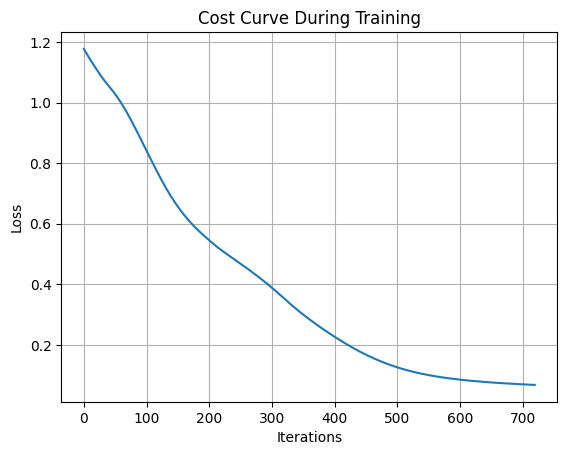

In [7]:
# Initialize and train the MLPClassifier
mlp = MLPClassifier(None, 
                    None, 
                    None, 
                    None)

mlp.fit(None, None)

print(f"Final loss: {mlp.loss_}")  # Final loss value after training
print(f"Number of iterations: {mlp.n_iter_}")  # Number of iterations the model performed
print(f"Best loss: {mlp.best_loss_}")  # Best loss (when early stopping is used)

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('Cost Curve During Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

<font color='blue'>**Expected output (with Iris dataset and the proposed parameters):**  </font>

```
Final loss: 0.06797965925841051
Number of iterations: 720
Best loss: 0.06797965925841051
```

The model coeficients (**weights**) are stored in the `coefs_` attribute. It provides valuable insight about the network structure, so let's take a closer look at it. Another key attribute is `intercepts_`, which is where the library stores the weights associated with the bias terms (the constant 1s added to the input vector and the activations of each layer).

In [8]:
print('Number of hidden layers:', len(mlp.coefs_)-1) # We have to substract the output layer

print('Size of Weight matrices at each layer')
for coef in mlp.coefs_:
    print (coef.shape)

print('Weights associated to bias terms (intercepts):')
for intercept in mlp.intercepts_:
    print(intercept.shape)

Number of hidden layers: 2
Size of Weight matrices at each layer
(4, 10)
(10, 5)
(5, 3)
Weights associated to bias terms (intercepts):
(10,)
(5,)
(3,)


<font color='blue'>**Expected output (with Iris dataset and the proposed parameters):**  </font>

```
Number of hidden layers: 2
Size of weight matrices at each layer
(4, 10)
(10, 5)
(5, 3)
Weights associated to bias terms (intercepts):
(10,)
(5,)
(3,)
```

### **<span style="color:green"><b><i>ASSIGNMENT 4: Analyzing MLP performance</i></b></span>**

**Let's complete the following code** to analyze the model performance. For that:
- Call the `predict()` function with the right data.
- Show the first 5 predicted labels along with their corresponding true labels.
- Prints its accuracy, with `accuracy_score()` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html),
- The confusion matrix, with `confusion_matrix()` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), 
- And the classification report with `classification_report()`[(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [9]:
# Make predictions on the test set
y_pred = mlp.predict(None)

# Display first 5 predictions
print("First 5 predicted labels:", None)
print("Corresponding true labels:", None)

# Assignment: Calculate and print the accuracy score
accuracy = accuracy_score(None, None)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Evaluate the model performance using classification metrics
print("Confusion Matrix:")
print(confusion_matrix(None, None))

print("\nClassification Report:")
print(classification_report(None, None))

First 5 predicted labels: [1 0 2 1 1]
Corresponding true labels: [1 0 2 1 1]
Accuracy on the test set: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<font color='blue'>**Expected output (with Iris dataset and the proposed parameters):**  </font>

```
First 5 predicted labels: [1 0 2 1 1]
Corresponding true labels: [1 0 2 1 1]
Accuracy on the test set: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
```

### <font color="blue"><b><i>Thinking about it (2)</i></b></font>

Given your growing expertise with MLP, **answer this questions:**

- How many layers has the rained MLP? Of which type?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    
- What is the size of each weight matrix, and how does it relate to the input features, hidden layers, and output classes?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- Given that the output layer has more than a neuron, how is the final MLP output computed?
    
    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>




#### A final note on softmax

Since the trained model has the `softmax` activation function in the output layer, so you can retrieve probabilities about the classification using the `predict_proba()` function. 

The following code illustrate this:

In [10]:
print(mlp.out_activation_)

y_pred = mlp.predict_proba([X_test_scaled[0,:]])

formatted_probas = [f"{prob:.2%}" for prob in y_pred[0]]
print(f"Predicted probabilities for the first sample (as percentages): {formatted_probas}")

softmax
Predicted probabilities for the first sample (as percentages): ['0.09%', '97.82%', '2.09%']


### **<span style="color:green"><b><i>OPTIONAL</i></b></span>**

You can try the Perceptron and MLP performance with any other dataset of your choice. There are may computer vision-related datasets on the internet!  

### **<span style="color:green"><b><i>END OF OPTIONAL PART</i></b></span>**

### **<span style="color:green"><b><i>OPTIONAL</i></b></span>**

scikit-learn has many different classification techniques. You can try other models and see how they perform.

### **<span style="color:green"><b><i>END OF OPTIONAL PART</i></b></span>**

## Summary
In this notebook, we used a Perceptron and a Multilayer Perceptron to classify samples from different datasets, like the Iris flowers species and the Breast Cancer detection. We explored data preprocessing steps, trained those models, and evaluated them. 

This is just the beginning! The neural networks journey is vast...